<span style="color: Blue;">**Predicting E-Commerce Purchases Using KNN**</span>

**OVERVIEW**

An e-commerce company, wants to understand and predict customer purchase behavior using one year of session data. The target variable, “Made_purchase,” indicates whether a user bought something, and we will apply **K-Nearest Neighbors (KNN)** to build a predictive model after cleaning and preparing the data due to possible collection errors.

**Source of data:** kaggle competitions download -c e-commerce-shoppers-behaviour

In [ ]:
#Importing libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading training dataset into a pandas DataFrame
df = pd.read_csv('train_data_v2.csv')

In [ ]:
# Displaying the first five rows of the dataset
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [ ]:
# Displaying dataset dimensions
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 14731
Number of Columns: 22


In [ ]:
# Statistical summary of numerical features in the dataset
df.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [ ]:
# Checking for missing values in the dataset
df.isnull().sum()

,0
HomePage,153
HomePage_Duration,150
LandingPage,153
LandingPage_Duration,135
ProductDescriptionPage,123
ProductDescriptionPage_Duration,167
GoogleMetric:Bounce Rates,151
GoogleMetric:Exit Rates,129
GoogleMetric:Page Values,132
SeasonalPurchase,150


In [ ]:
# Identifying rows with atleast two missing values in key columns
cols_to_check = [
    'HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
    'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
    'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values',
    'SeasonalPurchase', 'Month_SeasonalPurchase', 'OS', 'SearchEngine',
    'Zone', 'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
    'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'
]

rows_missing_at_least_two = df[df[cols_to_check].isnull().sum(axis=1) >= 2]

print(f"Number of rows missing at least two columns: {len(rows_missing_at_least_two)}")

Number of rows missing at least two columns: 0


The goal was to remove any row from the dataset that had missing values in at least two of the specified columns, in order to improve data quality for analysis and modeling.

In [ ]:
# Separating categorical and numerical Columns
cat = []
num = []

for col in df.columns:
    if df[col].dtypes == 'object':
        cat.append(col)
    else:
        num.append(col)

print("Categorical columns:", cat)
print("Numerical columns:", num)

Categorical columns: ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']
Numerical columns: ['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration', 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase', 'Made_Purchase']


In [ ]:
# Selecting and previewing numerical columns
num_df = df.select_dtypes(include=['number'])
num_df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,4.0,1.0,9.0,3.0,0.0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3.0,2.0,2.0,4.0,0.0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3.0,3.0,1.0,4.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,2.0,4.0,3.0,3.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,1.0,2.0,1.0,5.0,1.0


In [ ]:
# Calculating skewness of selected numerical features
skewness = df[['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration', \
    'ProductDescriptionPage', 'ProductDescriptionPage_Duration', \
    'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', \
    'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase']].skew()

print(skewness)

HomePage                           2.033559
HomePage_Duration                  5.922487
LandingPage                        4.145429
LandingPage_Duration               7.997997
ProductDescriptionPage             4.459032
ProductDescriptionPage_Duration    8.580754
GoogleMetric:Bounce Rates          2.830608
GoogleMetric:Exit Rates            2.067722
GoogleMetric:Page Values           7.588103
SeasonalPurchase                   3.217069
OS                                 2.087637
SearchEngine                       3.224702
Zone                               0.973204
Type of Traffic                    1.928581
WeekendPurchase                    1.255688
dtype: float64


Since most of the skewness > 0.5, I will use the median to fill the missing values as it is better than the mean because it’s not pulled by outliers and gives a more accurate central value for imputation.

In [ ]:
# Imputing missing values in highly Skewed columns using median
for col in skewness.index:
    if abs(skewness[col]) > 0.5:
        df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# Imputing missing values in categorical columns using mode
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Converting target variable 'Made_Purchase' to integer type
df['Made_Purchase'] = df['Made_Purchase'].astype(int)

In [ ]:
df.sample(3)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
808,0.0,0.000000,0.0,0.0,3.0,39.666667,0.000000,0.033333,0.000000,0.0,...,4.0,1.0,10.0,Returning_Visitor,Female,ALL,Graduate,Married,0.0,0
4478,6.0,158.670450,1.0,430.2,146.0,5602.006712,0.002672,0.009352,6.711291,0.0,...,10.0,7.0,2.0,Returning_Visitor,Male,ALL,Others,Married,0.0,1
8566,6.0,95.916667,0.0,0.0,19.0,671.550000,0.000000,0.020455,28.128766,0.0,...,2.0,7.0,2.0,Returning_Visitor,Male,Deny,Graduate,Other,0.0,0


In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df,cat_cols, drop_first=True)

In [ ]:
df_encoded.sample(3)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,CustomerType_Returning_Visitor,Gender_Male,Gender_Not Specified,Cookies Setting_Deny,Cookies Setting_Required,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Other,Marital Status_Single
2189,2.0,7.0,1.0,0.0,79.0,3393.903571,0.017762,0.040310,0.0,1.0,...,True,True,False,False,True,False,True,False,True,False
3130,0.0,0.0,0.0,0.0,20.0,267.500000,0.022222,0.028889,0.0,0.6,...,True,False,False,False,True,False,True,False,False,False
384,0.0,0.0,0.0,0.0,3.0,27.000000,0.066667,0.133333,0.0,0.0,...,True,False,True,True,False,False,True,False,False,True


In [ ]:
# Separating features and target variable
X = df_encoded.drop('Made_Purchase', axis=1)
y = df_encoded['Made_Purchase']

In [ ]:
num_X = X.select_dtypes(include=['number'])
num_X.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,4.0,1.0,9.0,3.0,0.0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3.0,2.0,2.0,4.0,0.0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3.0,3.0,1.0,4.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,2.0,4.0,3.0,3.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,1.0,2.0,1.0,5.0,1.0


In [ ]:
# Scaling features using Min-Max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in num_X.columns:
    X[col] = scaler.fit_transform(X[[col]])

In [ ]:
# Splitting data into training and test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Importing KNN, GridSearchCV, and Evaluation Metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Accuracy of KNN model before hyperparameter tuning
knn = KNeighborsClassifier()
model = knn.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

0.5218866644044792


The accuracy is 0.5219 before hyperparameter tuning meaning the model correctly predicted about 52% of cases. This can likely improve by adjusting hyperparameters or features.

In [ ]:
# Defining parameter grid
param_grid = {
    'n_neighbors': list(range(3, 5)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initializing the model
knn = KNeighborsClassifier()

# Seting up GridSearchCV
knn_cv = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit model
knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
# Best hyperparameters found
print("Best Parameters:", knn_cv.best_params_)

# Best cross-validation score
print("Best CV Accuracy:", knn_cv.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Best CV Accuracy: 0.5688211180365821


In [ ]:
# Generating predictions on the test set
y_pred = knn_cv.predict(X_test)

**Model Evaluation and Performance Metrics**

In [ ]:
# Evaluating model Accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5639633525619274


The model correctly predicts about 56% of cases..

In [ ]:
# Model Prediction Confusion Matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[1558  262]
 [1023  104]]


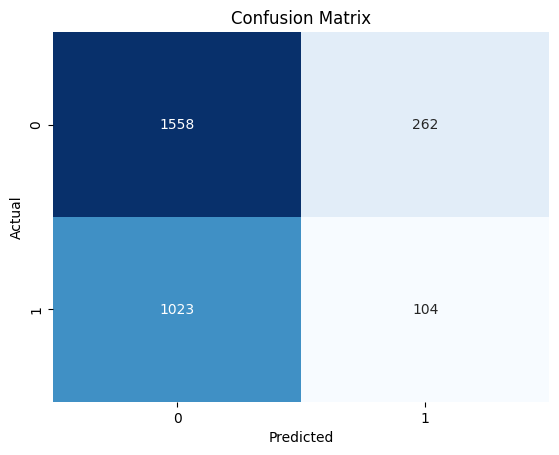

In [ ]:
# Visualization of Confusion Matrix
sns.heatmap(cf, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Out of 1,127 actual positives, it only identified 104 correctly, giving a recall of about 9%, while for class 0 it correctly predicted 1,558 out of 1,820 cases.

In [ ]:
# Classification Performance Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.86      0.71      1820
           1       0.28      0.09      0.14      1127

    accuracy                           0.56      2947
   macro avg       0.44      0.47      0.42      2947
weighted avg       0.48      0.56      0.49      2947



The model performs well on class 0 but poorly on class 1. Class 0 has high recall (0.86) and moderate precision (0.60), so most actual 0s are detected. Class 1 has very low recall (0.09) and precision (0.28), meaning it’s often missed. Overall accuracy is 56%, reflecting moderate performance.

**ROC Curve and AUC for Model Performance**

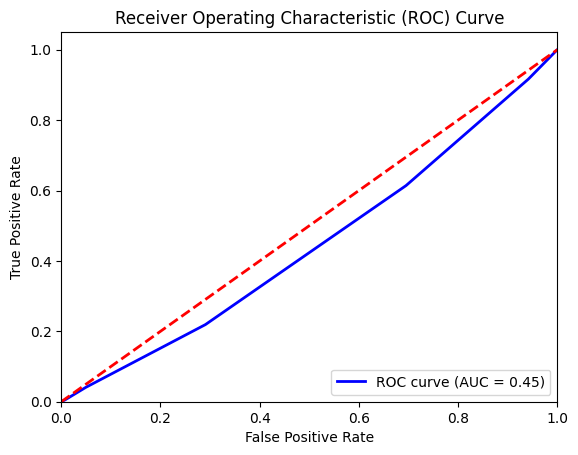

In [ ]:
# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Since the model's AUC score is 0.45, which is worse than random guessing, it shows that the model is not performing well in distinguishing between the classes. This means its predictions are unreliable and misleading. Therefore, I will not use this model to predict the test dataset because it cannot provide meaningful or accurate results.

**I have performed hyperparameter tuning on the KNN model in an attempt to improve its performance, but the results are still not satisfactory for making reliable predictions. I would greatly appreciate any guidance offered to further improve the model's performance. Thanks.**